# 2020.05.16 머신러닝 알고리즘 스터디
# KNN (K-nearest Neighbors Algorithm)

## Connect to Google Drive

In [14]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import sys
sys.path.append("/content/gdrive/My Drive/Colab Notebooks")

Mounted at /content/gdrive


## 1. 개요

- 새로운 데이터가 주어졌을 때, 기존 데이터 가운데 가장 가까운 k개의 이웃의 정보로 새로운 데이터를 예측하는 방법론.


![alt text](https://drive.google.com/uc?id=1ibAmH2EFbvRQmWIG7bCbqeIhYZ4ILyQF)

- 새로운 데이터: 검은색 점
- k = 1 : 주황색으로 예측 (분류 문제)
- k = 3 : 초록색으로 예측 (분류 문제)
- 이웃들 종속변수 ( y ) 의 평균이 예측 (회귀 문제)

### Instance-based Learning ( Lazy Model ; 게으른 모델 )

- 새로운 데이터가 들어왔을 때, 그제서야 기존 데이터 사이의 거리를 재서 이웃을 뽑는다.
- 따라서 모델을 별도로 미리 구축하지 않는다.
- 별도 모델 생성과정 없이 각각의 관측치(instance)만을 이용하여 분류/회귀 등 과업을 수행한다.
- Learning happens at prediction time.
- KNN, Kernel machines(SVM), RBF networks(Radial basis function network).

#### Model-based Learning

- 적절한 목표를 얻기 위한 결과를 달성해내기 위해 어떤 환경에서 일어날 만한 모델을 만들어 추론한다.
- tunning 할 parameter 들이 존재한다.
- 학습은 최적의 parameter를 찾는 데 중점을 둔다.
- Logstice, Decision Tree

## 2. 학습과정

### Hyper parameter

1. 탐색할 이웃 수 ( k )
2. 거리 측정 방법

### 2-1. 탐색할 이웃 수 ( k )

- k가 작을 경우 : 데이터의 지역적 특성을 지나치게 반영 (overfitting)
- k가 클 경우 : 모델이 과하게 정규화되는 경향이 있다(underfitting).

![alt text](https://drive.google.com/uc?id=1WdqGiGffWNHb6gRroD9l6_iDop8nUscY)

- KNN은 경계면을 직접 만드는 것이 아니고, 새로운 데이터가 주어졌을 때 어느 범주로 분류되는지를 시각화한 자료

#### 최적의 k 찾기

In [4]:
!pip install mglearn

     |████████████████████████████████| 542kB 2.7MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.7-py2.py3-none-any.whl size=582705 sha256=4023825d45b3a47e1b576080c476c7d55f40ffb2f57f5547267a3ec51917bff0
  Stored in directory: /root/.cache/pip/wheels/74/cf/8d/04f4932d15854a36726c6210763c7127e62de28f5c8ddfcf3b
Successfully built mglearn


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


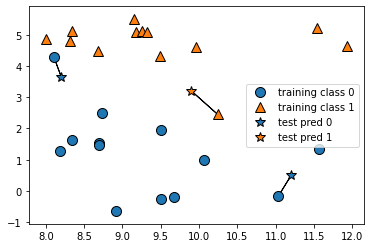

In [5]:
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=1)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


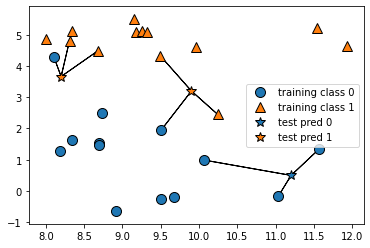

In [6]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


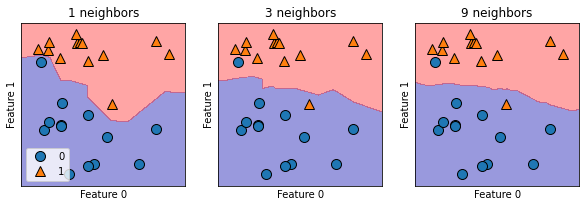

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # fit 메서드는 self 객체를 반환합니다.
    # 그래서 객체 생성과 fit 메서드를 한 줄에 쓸 수 있습니다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, 
                                    ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbors".format(n_neighbors))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

axes[0].legend(loc=3)

- k의 갯수가 증가할수록 경계가 부드러워 진다.

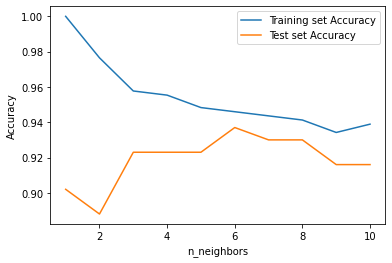

In [12]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
   cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="Training set Accuracy")
plt.plot(neighbors_settings, test_accuracy, label="Test set Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

### 2-2. 거리 측정 방법

#### 2-2-1. Euclidean Distance

- 가장 흔히 사용되는 거리 척도
- 두 관측치 (instance) 사이의 직선 최단거리

![alt text](https://drive.google.com/uc?id=1KkjAAi_s-oKeVpF2YKALa2wSlP1DSsIi)

![alt text](https://drive.google.com/uc?id=1cc0FByz1F4Tz42qxTk4Wsn8KGudj4zQq)

#### 2-2-2. Manhatten Distance ( = Taxi cab Distance)


- A에서 B로 이동할 때 각 좌표축 방향으로만 이동할 경우에 계산되는 거리.
- 뉴욕 맨해튼의 한 빌딩에서 다른 빌딩으로 이동하기 위해서는 격자 모양의 길을 따라가야 한다. 여기서 유래되었다.

![alt text](https://drive.google.com/uc?id=1h2CBslzWCH27Ou5lykAYK7GU6iNZazA_)

![alt text](https://drive.google.com/uc?id=1l2-v_pA7hOkrD9xHopVjX4fvMWtktP-j)

#### 2-2-3. Mahalanobis Distance

- 변수 내 분산, 변수 간 공분을 모두 반영하여 거리를 계산.
- 변수 간의 상관관계를 고려한 거리 지표.

![alt text](https://drive.google.com/uc?id=1q21V-_CnbxoZTgQ5-MyNyvz4RBrlcrE6)

- X = (x1, x2)
- Y = (0 , 0)
- X , Y 사이의 마할라노비스 거리를 c 라고 가정하자.

![alt text](https://drive.google.com/uc?id=1f1yZinuTKtobjDOtK__yyt8z5UuSiV9o)

- 타원의 방정식 꼴로 변환.

#### c 를 1이라고 가정하고, 공분산행렬에 따라 어떻게 바뀌는지 살펴보자.

- 아래의 그림들에 나오는 타원 위의 점들은 마할라노비스 거리 기준으로 모두 같은 거리다. <br><br>

- 공분산 행렬이 항등행렬일 경우, ( 마할라노비스 거리 ) == ( 유클리드 거리 )

![alt text](https://drive.google.com/uc?id=1niisCVLiGlYfduf_dGfDzJWul28jrCJL)
![alt text](https://drive.google.com/uc?id=1qkBFw8rmNG8VXSphOw5UF3cZ5X4wO3u_)

- 공분산 행렬이 다음과 같을 경우 <br><br>
![alt text](https://drive.google.com/uc?id=1BnDw0uPHMJRu1_XD2Cyy3Y5PqDfCwX-I)

- 공분산 행렬이 다음과 같을 경우 <br><br>
![alt text](https://drive.google.com/uc?id=18zo-SH_3q4Ctywz-mVrujeUDo3i5qx2b)

#### 공분산을 그대로 두고, c 값을 바꿔보자.

![alt text](https://drive.google.com/uc?id=1NnoZaUSU8QD9x0VXIIoG6QpYFmwJKxO1)

- c 값이 커질수록 거리가 증가한다.

#### Euclidean Distance vs Mahalanobis Distance

아래와 같은 데이터가 주어졌다. <br><br>

![alt text](https://drive.google.com/uc?id=16oGmvmdeWUVmgaQXORzOZgRfTMHVQQYU)

- Euclidean Distance <br>
( 데이터 중심과 A의 거리 ) > ( 데이터 중심과 B의 거리 )
<br><br>
- Mahalanobis Distance <br>
( 데이터 중심과 A의 거리 ) < ( 데이터 중심과 B의 거리 ) <br>
변수 간의 양의 상관관계가 강해서, 그 방향과 동떨어진 B가 꽤 멀게 계산되기 때문이다.

#### 2-2-4. Correlation Distance

- 데이터의 pearson correlation 을 거리 척도로 사용.
- 개별 관측치가 아닌 데이터 전체의 경향성을 비교하기 위한 척도.
- 상관계수의 범위 : [ -1 , 1 ]
- Correlation Distance 의 범위 : [ 0 , 2 ]
- 0 이면, 두 데이터의 패턴이 매우 유사, 2이면 유사하지 않음.

![alt text](https://drive.google.com/uc?id=1FG9EWtqbd8vU2OYw7UnqEKgo39W_XGdX)

- 좌측은 correlation Distance 가 가깝게(패턴이 유사)
- 우측은 멀게 나타난다(패턴이 다름).

![alt text](https://drive.google.com/uc?id=1l3iaCbE7-K0DFxsWk6CJ-tuNbLn2hezH)

#### cf. Rank Correlation Distance

## 3. 특징과 장단점

### 3-1. KNN 수행 시 주의점

- 반드시 변수를 정규화(Normalization) 실시.

![alt text](https://drive.google.com/uc?id=1z4w7T7PgAuvlyBoZAbuB3tG5mQDu0vMK)

- 위 기준으로는 거리 / 유사성 측정시 미세먼지농도가 전혀 반영되지 않을 것이다.
- 따라서 변수끼리 평균과 분산을 일치시키는 정규화 작업을 반드시 시행!

### 3-2. 장단점

#### 장점 <br>
- noise 의 영향을 크게 받지 않으며, 학습 데이터 수가 많을 때 꽤 효과적인 알고리즘.
- 특히, 마할라노비스 거리와 같이 데이터의 분산을 고려할 경우 매우 강건 ( robust ) 한 방법.
- 네이버, 카카오 등 현업에서도 KNN 을 두루 사용함.

#### 단점 <br>
- 최적의 이웃 수 k 와 어떤 거리척도가 분석에 적합한 지 모르기 때문에, 특성에 맞게 연구자가 임의로 선정해야 함.
- 새로운 관측치와 각각의 학습 데이터 간의 거리를 계산해야 하므로 시간이 오래 걸린다.

#### 단점을 보완하기 위한 방법 <br>
- Locality Senstitive Hashing
- Network based Indexer
- Optimized product quantization
- 인스턴스 간 거리를 모두 계산하지 않고도 마치 그렇게 한 것처럼 결과를 내는 방법론들.

## Reference



- https://www.quora.com/What-are-the-differences-between-instance-based-and-model-based-learning-in-machine-learning
- https://en.wikipedia.org/wiki/Instance-based_learning
- https://ratsgo.github.io/machine%20learning/2017/04/17/KNN/
- https://tensorflow.blog/%ED%8C%8C%EC%9D%B4%EC%8D%AC-%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D/2-3-2-k-%EC%B5%9C%EA%B7%BC%EC%A0%91-%EC%9D%B4%EC%9B%83/